Import Keras related modules

In [ ]:
from keras.models import Sequential
from keras.layers import Flatten, Dense, Dropout, Activation
from keras.utils import np_utils
from keras.datasets import mnist

Keras library is available by default in Google collab, from keyword is used to import the libraries and modules
MNIST dataset is already available in the datasets module under Keras.
matplotlib library has functions to plot arrays as images

Import plotting modules

In [ ]:
from matplotlib import pyplot as plt

LOAD MNIST DATA

In [ ]:
(X_train,y_train),(X_test,y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


Let us understand the data and visualize one of the data elements

(60000, 28, 28)
(60000,)
5


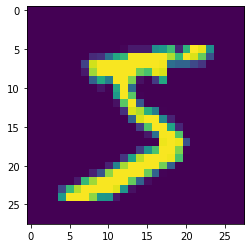

In [ ]:
print(X_train.shape)
plt.imshow(X_train[0])

print(y_train.shape)
print(y_train[0])

load_data function of the mnist loads the train and test data of MNIST into variables X_train,y_train and X_test,y_test

X_train holds the 60000 training data images, each of which is a 28*28 image

We are plotting the first training sample here.

y_train holds the actual digit corresponding to X_train image.
X_train and y_train are used to train our deep learning model

# Preprocess the data

Normalize X_train and X-test which has integers between 0 and 255 to floats between 0 and 1 by dividing with 255

Convert the Y values y_train and y_testwhich are class data between 0 and 9 to categorical data
0=[1,0,0,0,0,0,0,0,0,0]
1=[0,1,0,0,0,0,0,0,0,0]
9=[0,0,0,0,0,0,0,0,0,1]

In the example y_train[0] is 5

In [ ]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255


Convert 1-D class arrays to 10-D class matrices  and view the result

In [ ]:
Y_train =np_utils.to_categorical(y_train,10)
Y_test=np_utils.to_categorical(y_test,10)
print(Y_train[0])            

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


DEFINE THE MODEL

Model us defined to be of type Sequential, this means we append layers one by one.
model.add is used to append the layers
model.summary provides a summary of the each layer including the number of trainable parameters. Only Dense layers have trainable parameters.

No. of trainable parameters = (number of neurons in previous layer+1)*(number of neurons in next layer)

model.compile configures the model for training with all the hyperparameters, takes the loss function as a parameter

In [ ]:
model= Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10))
model.add(Activation('softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
_________________________________________________________________
activation (Activation)      (None, 10)                0         
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

Input layer: Tensor of as many input smaples (see ?), each of dimension 28*28
Layer1: flatten 28*28 image into 1-D vector of length 784
Layer2: a fully connected neural network layer with 128 neurons
Layer3: build a 20% drop out, that is turn off 20% off the neurons randomly in the previous layer each time 
Layer4: A fully connected neural network layer with 10 neurons
Layer5: Apply softmax activation to normalize across all 10 output neurons. The class which is most likely gets the highest value between 0 and 1

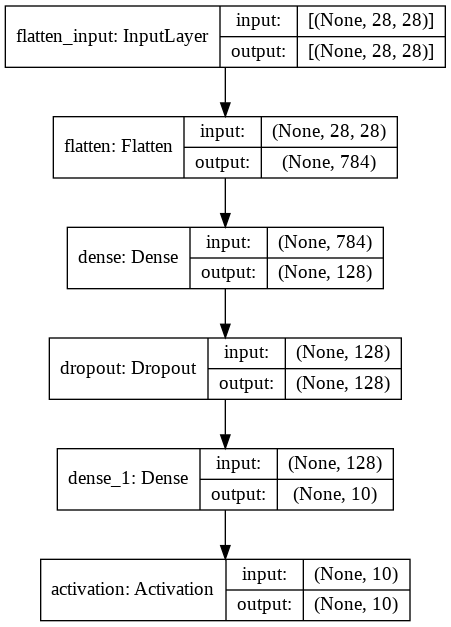

In [ ]:
from keras.utils import plot_model
plot_model(model,
           to_file='model.png',
           show_shapes=True,
           show_layer_names=True,
           rankdir='TB',
           expand_nested=False,
           dpi=96)

TRAIN THE MODEL

model.fit is used to perform the training of the model
epochs is the number of times the model learns through all training smaples
batch_size is the number of samples taken in one iteration before updating the weights. Balances between memory utilization and stability since batch_size=32 and number of samples=60000, each epoch has 60000/32= 1875 mini batches
verbose provides the detailed output of each epoch
loss function is value at the end of each epoch
accuracy calculates how often prediction equal labels. Becomes 1 when all the predictions match expected vlaue. In output of fit function, accuracy is with respect to training data.


In [ ]:
model.fit(X_train,Y_train, batch_size=32,epochs=10, verbose=1)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4800 - accuracy: 0.8588
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1515 - accuracy: 0.9555
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1059 - accuracy: 0.9690
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0874 - accuracy: 0.9726
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0733 - accuracy: 0.9775
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0632 - accuracy: 0.9794
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0566 - accuracy: 0.9820
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0545 - accuracy: 0.9824
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0461 - accuracy: 0.9838
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.042

EVALUATE THE MODEL

model.evaluate is used to evaluate the model accuracy with respect to the test data

It is sone in batches, where batch_size is defined during the training of the model. In this case number of mini batches is 10000/32 =313

Accuracy: calculates how often predictions equals labels. Becomes 1 when all the predictions match expected value, in the output of evaluate function, accuracy is with respect to testing data

reshape function is used to flatten the test data into a format similar to how the training data was flattened 

model.predict is used to get the prediction for test data based on the trained model

argmax returns the index of the maximum value of the array, similar functionality as softmax activation in training

We plot the first test image X_test[0], expected output is y_test[0] and the value predicted by the model predicted_class

In [ ]:
score = model.evaluate(X_test, Y_test, verbose=1)

313/313 [==============================] - 1s 2ms/step - loss: 0.0703 - accuracy: 0.9794


7


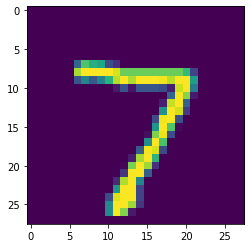

In [ ]:
plt.imshow(X_test[0])
print(y_test[0])

In [ ]:
import numpy as np
from numpy import argmax
X_test0 =X_test[0].reshape(-1,28,28)
prediction = model.predict(X_test0)
#Generate the argmax for prediction
predicted_class= argmax(prediction)
print(predicted_class)

7
